In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [46]:
def detailed_analysis(df, state_col='state', label_col='label'):
    """
    Detailed analysis using groupby
    """
    # Group by state and count labels
    state_label_counts = df.groupby([state_col, label_col]).size().unstack(fill_value=0)
    
    # Add total column
    state_label_counts['Total'] = state_label_counts.sum(axis=1)
    
    # Calculate attack rate (percentage of label=1)
    if 1 in state_label_counts.columns and 0 in state_label_counts.columns:
        state_label_counts['Attack_Rate_%'] = (
            state_label_counts[1] / state_label_counts['Total'] * 100
        ).round(2)
    
    # Sort by attack rate
    state_label_counts = state_label_counts.sort_values('Attack_Rate_%', ascending=False)
    
    print(f"{state_col} Analysis with Attack Rates:")
    print(state_label_counts)
    print("\n")
    
    return state_label_counts

In [2]:
raw_data = pd.read_csv(r'C:\Users\DELL\Desktop\Cyber security project\Datasets\UNSW_NB15_training-set.csv')


In [3]:
raw_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [57]:
raw_data.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label',
       'service_attack_rate', 'state_risk_category'],
      dtype='object')

In [56]:
raw_data = raw_data.drop(columns=['id'])

In [ ]:
raw_data.drop_duplicates(inplace=True)

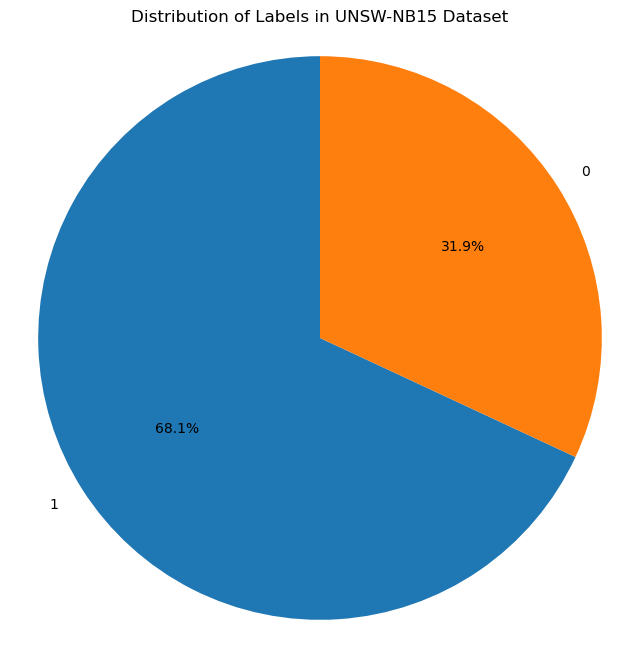

In [5]:
label_counts = raw_data['label'].value_counts()

# Display pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts,
        labels=label_counts.index,
        autopct='%1.1f%%',
        startangle=90)

plt.title("Distribution of Labels in UNSW-NB15 Dataset")
plt.axis('equal')  # makes the pie chart a circle
plt.show()

In [6]:
raw_data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [8]:
feature_info = pd.read_csv(r'C:\Users\DELL\Desktop\Cyber security project\Datasets\NUSW-NB15_features.csv', encoding='latin1')
feature_info

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [20]:
# Method 1: Using pandas select_dtypes (Most Common)
def classify_features_basic(df):
    """
    Classify features based on data types
    """
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return {
        'numerical': numerical_features,
        'categorical': categorical_features
    }

In [22]:
result1 = classify_features_basic(raw_data)
numerical_features = result1['numerical']
categorical_features = result1['categorical']
print(f"Numerical: {numerical_features}")
print(f"Categorical: {categorical_features}\n")

Numerical: ['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label']
Categorical: ['proto', 'service', 'state', 'attack_cat']



In [9]:
raw_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [10]:
raw_data['attack_cat'].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

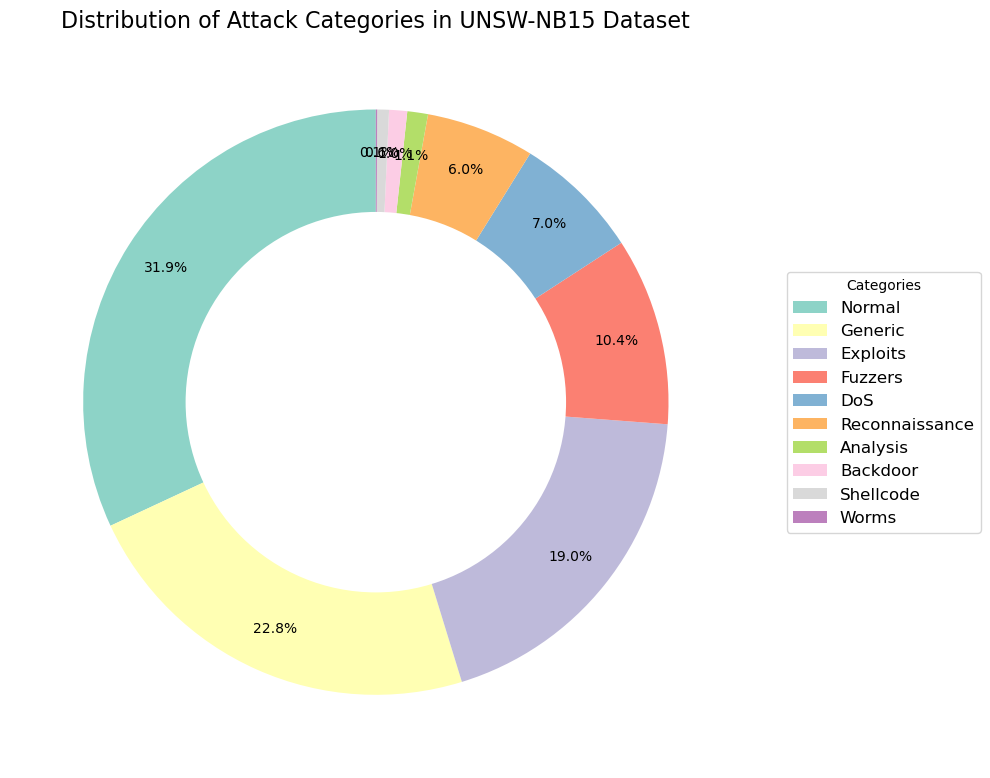

In [11]:


label_counts = raw_data['attack_cat'].value_counts()

# Custom colors (distinct, modern palette)
colors = plt.cm.Set3(range(len(label_counts)))

plt.figure(figsize=(10, 10))
plt.pie(label_counts,
        labels=None,                     # remove overlapping labels
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,                # move percentages inside
        colors=colors)

# Draw a white circle in the middle (donut style)
centre_circle = plt.Circle((0,0), 0.65, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Attack Categories in UNSW-NB15 Dataset", fontsize=16)

# Add legend outside
plt.legend(label_counts.index,
           title="Categories",
           loc="center left",
           bbox_to_anchor=(1.05, 0.5),
           fontsize=12)

plt.tight_layout()
plt.show()


In [12]:
# Count occurrences of each protocol
proto_counts = raw_data['proto'].value_counts()
proto_counts

proto
tcp       79946
udp       63283
unas      12084
arp        2859
ospf       2595
          ...  
argus        98
netblt       98
igmp         18
icmp         15
rtp           1
Name: count, Length: 133, dtype: int64

In [13]:
raw_data['proto'].unique()
# 133 unique protocols found

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

C:\Users\DELL\AppData\Local\Temp\ipykernel_5404\2991537178.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=proto_counts.index, x=proto_counts.values, palette="Set1")


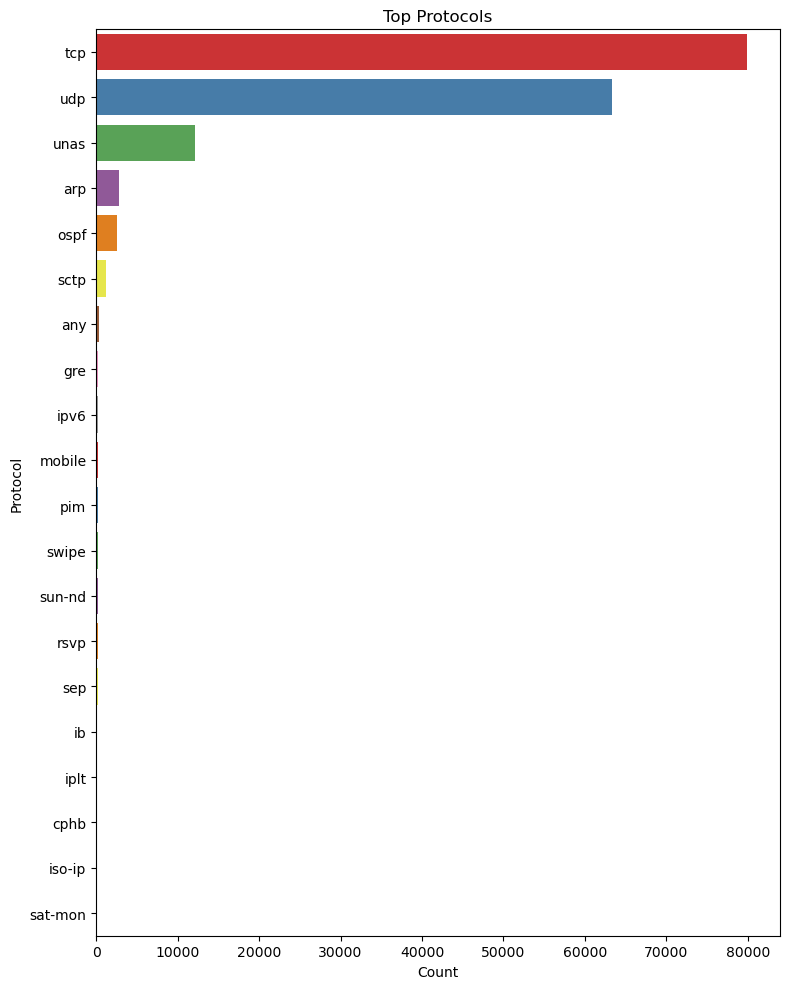

In [14]:
proto_counts = raw_data['proto'].value_counts().head(20)

plt.figure(figsize=(8,10))
sns.barplot(y=proto_counts.index, x=proto_counts.values, palette="Set1")

plt.title("Top Protocols")
plt.xlabel("Count")
plt.ylabel("Protocol")
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5404\4047091214.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=others.values, y=others.index, palette="Set3")


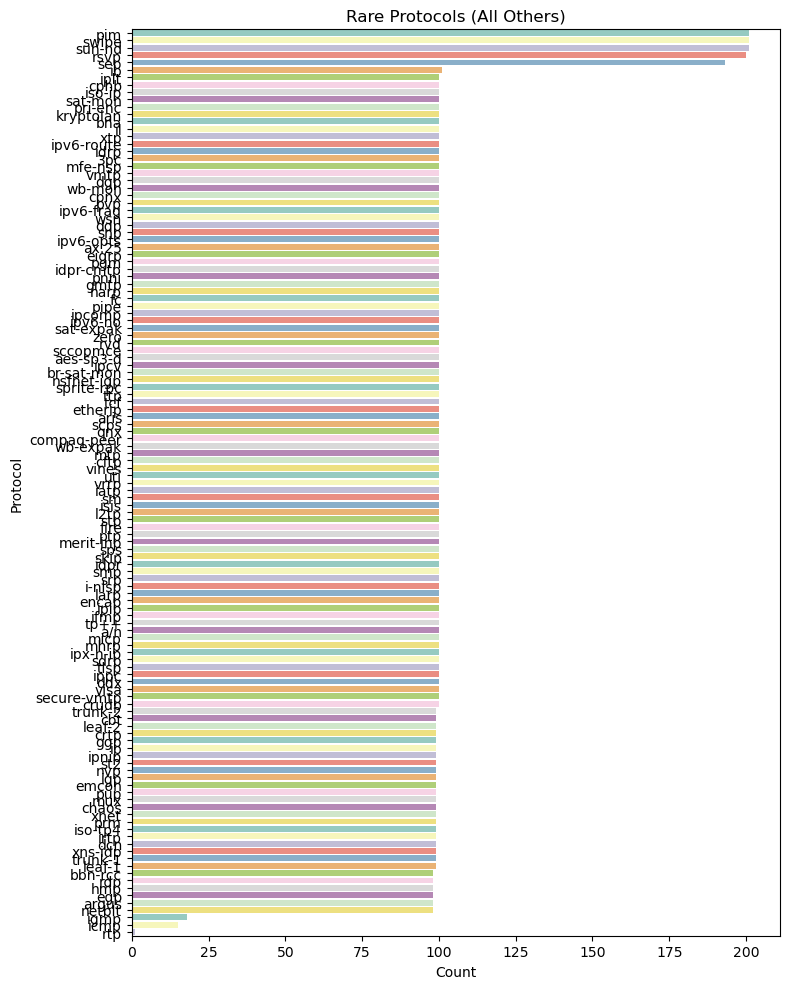

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Value counts
proto_counts = raw_data['proto'].value_counts()

# Split into two groups
top10 = proto_counts.head(10)       # Most frequent
others = proto_counts[10:]          # Rare protocols



# --- Plot 2: Remaining Rare Protocols ---
plt.figure(figsize=(8, 10))
sns.barplot(x=others.values, y=others.index, palette="Set3")
plt.title("Rare Protocols (All Others)")
plt.xlabel("Count")
plt.ylabel("Protocol")
plt.tight_layout()
plt.show()


In [24]:
feature_info

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [25]:
raw_data['service'] = raw_data['service'].replace('-', 'unknown')


In [26]:
raw_data["service"].value_counts()

service
unknown     94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_5404\3421136319.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Set2")


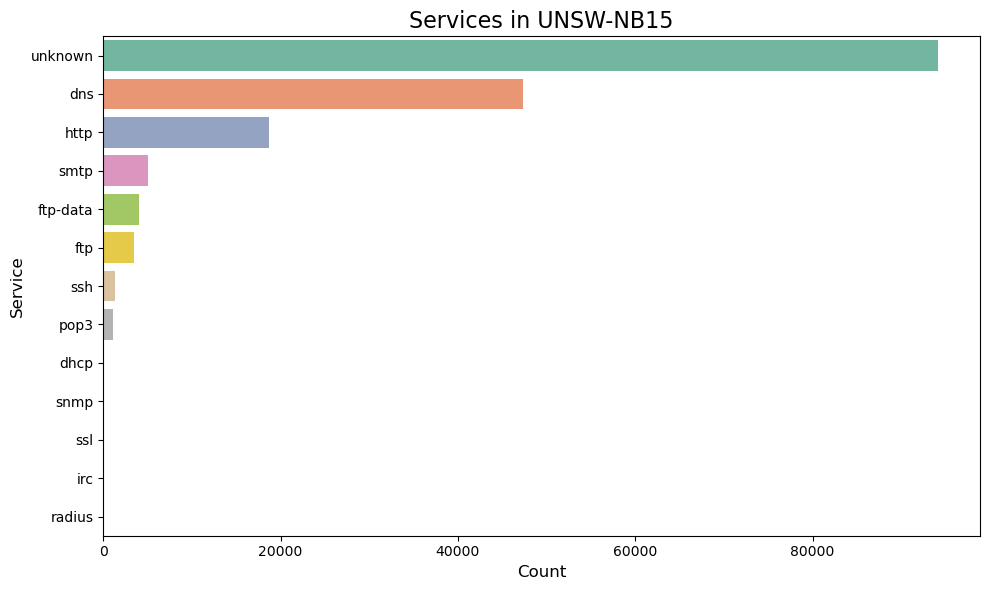

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Count occurrences
service_counts = raw_data['service'].value_counts()

# Select top 10 most frequent services
top10 = service_counts

plt.figure(figsize=(10, 6))
sns.barplot(x=top10.values, y=top10.index, palette="Set2")

plt.title("Services in UNSW-NB15", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Service", fontsize=12)
plt.tight_layout()
plt.show()


In [47]:
service_analysis = detailed_analysis(raw_data,state_col='service')

service Analysis with Attack Rates:
label         0      1  Total  Attack_Rate_%
service                                     
dhcp          0     94     94         100.00
ssl           0     56     56         100.00
irc           0     25     25         100.00
pop3          4   1101   1105          99.64
snmp          1     79     80          98.75
dns        7493  39801  47294          84.16
radius        2     10     12          83.33
http       5348  13376  18724          71.44
smtp       1579   3479   5058          68.78
ftp        1218   2210   3428          64.47
unknown   36512  57656  94168          61.23
ftp-data   2552   1443   3995          36.12
ssh        1291     11   1302           0.84




In [28]:
raw_data["state"].value_counts()

state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_5404\159439810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_states.values, y=top10_states.index, palette="Set2")


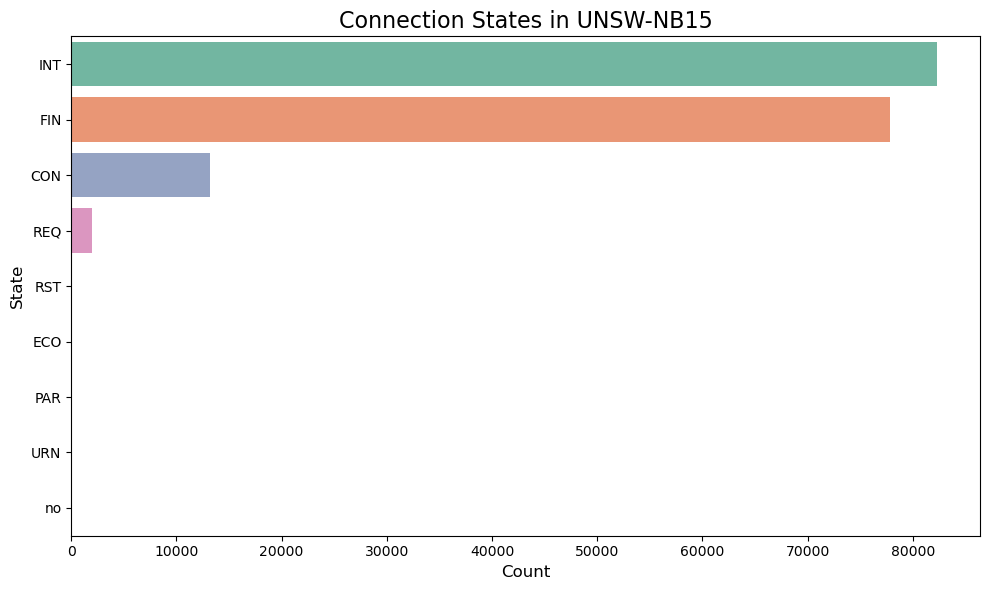

In [29]:
state_counts = raw_data['state'].value_counts()

# Select top 10
top10_states = state_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_states.values, y=top10_states.index, palette="Set2")

plt.title("Connection States in UNSW-NB15", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
state_analysis = detailed_analysis(raw_data,state_col='state')

State Analysis with Attack Rates:
label      0      1  Total  Attack_Rate_%
state                                    
INT     5715  76560  82275          93.05
REQ      925   1066   1991          53.54
FIN    37175  40650  77825          52.23
RST       71     12     83          14.46
CON    12099   1053  13152           8.01
PAR        1      0      1           0.00
ECO       12      0     12           0.00
URN        1      0      1           0.00
no         1      0      1           0.00




In [32]:
categorical_features

['proto', 'service', 'state', 'attack_cat']

In [38]:
def categorize_state_risk(state):
    if state == 'INT':
        return 'Critical'  # 93% attack rate
    elif state in ['REQ', 'FIN']:
        return 'High'      # ~53% attack rate
    elif state in ['RST', 'CON']:
        return 'Medium'    # 8-14% attack rate
    else:
        return 'Low'       # 0% attack rate


    

In [39]:
raw_data['state_risk_category'] = raw_data['state'].apply(categorize_state_risk)

In [40]:
raw_data['state_risk_category'].value_counts()

state_risk_category
Critical    82275
High        79816
Medium      13235
Low            15
Name: count, dtype: int64

In [41]:
raw_data['service_attack_rate'].value_counts()

service_attack_rate
61.23     94168
84.16     47294
71.44     18724
68.78      5058
36.12      3995
64.47      3428
0.84       1302
99.64      1105
100.00      175
98.75        80
83.33        12
Name: count, dtype: int64

In [43]:
raw_data[numerical_features]

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,...,1,1,1,0,0,0,1,1,0,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,...,1,1,2,0,0,0,1,6,0,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,...,1,1,3,0,0,0,2,6,0,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,1,1,3,1,1,0,2,1,0,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,...,2,1,40,0,0,0,2,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,24,13,24,0,0,0,24,24,0,1
175337,175338,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,...,1,1,2,0,0,0,1,1,0,1
175338,175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,3,3,13,0,0,0,3,12,0,1
175339,175340,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,30,14,30,0,0,0,30,30,0,1


In [55]:
result1 = classify_features_basic(raw_data)
numerical_features = result1['numerical']
categorical_features = result1['categorical']
print(f"Numerical: {numerical_features}")
print(f"Categorical: {categorical_features}\n")

Numerical: ['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'service_attack_rate']
Categorical: ['proto', 'service', 'state', 'attack_cat', 'state_risk_category']



In [59]:
X = raw_data.drop(columns=['label','attack_cat','service_attack_rate','state'])
y = raw_data['label']

In [60]:
X

,dur,proto,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,state_risk_category
0,0.121478,tcp,unknown,6,4,258,172,74.087490,252,254,...,1,1,1,0,0,0,1,1,0,High
1,0.649902,tcp,unknown,14,38,734,42014,78.473372,62,252,...,1,1,2,0,0,0,1,6,0,High
2,1.623129,tcp,unknown,8,16,364,13186,14.170161,62,252,...,1,1,3,0,0,0,2,6,0,High
3,1.681642,tcp,ftp,12,12,628,770,13.677108,62,252,...,1,1,3,1,1,0,2,1,0,High
4,0.449454,tcp,unknown,10,6,534,268,33.373826,254,252,...,2,1,40,0,0,0,2,39,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175267,1.914309,tcp,smtp,74,30,69997,2132,53.805315,62,252,...,1,1,1,0,0,0,18,1,0,High
175277,3.719110,tcp,unknown,66,340,3086,426483,108.897021,62,252,...,1,1,1,0,0,0,2,1,0,High
175299,0.996503,tcp,pop3,20,30,942,16684,49.171955,62,252,...,1,1,1,0,0,0,7,1,0,High
175305,1.557125,tcp,smtp,28,22,12601,1954,31.468251,62,252,...,1,1,2,0,0,0,2,1,0,High


In [61]:
from sklearn.model_selection import train_test_split

# X = all features
# y = target column (label = 0 normal, 1 attack)



# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y      # important for imbalanced datasets
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (86192, 42)
Testing size: (21548, 42)


In [48]:
def target_encode_feature(X_train, X_test, y_train, feature_name, smoothing=1.0):
    """
    Apply target encoding to a specific categorical feature
    
    Parameters:
    -----------
    X_train : DataFrame
        Training features
    X_test : DataFrame
        Test features
    y_train : Series
        Training target variable
    feature_name : str
        Name of the feature to encode
    smoothing : float
        Smoothing parameter to prevent overfitting (higher = more smoothing)
    
    Returns:
    --------
    X_train_encoded, X_test_encoded : DataFrames with encoded feature
    encoding_dict : dictionary with encoding mappings
    """
    # Calculate global mean of target
    global_mean = y_train.mean()
    
    # Calculate target mean and count for each category
    target_stats = pd.DataFrame({
        'target_mean': y_train.groupby(X_train[feature_name]).mean(),
        'count': y_train.groupby(X_train[feature_name]).count()
    })
    
    # Apply smoothing formula: (count * target_mean + smoothing * global_mean) / (count + smoothing)
    target_stats['smoothed_mean'] = (
        (target_stats['count'] * target_stats['target_mean'] + smoothing * global_mean) / 
        (target_stats['count'] + smoothing)
    )
    
    # Create encoding dictionary
    encoding_dict = target_stats['smoothed_mean'].to_dict()
    
    # Apply encoding to train and test
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    
    new_feature_name = f'{feature_name}_target_encoded'
    X_train_encoded[new_feature_name] = X_train[feature_name].map(encoding_dict)
    X_test_encoded[new_feature_name] = X_test[feature_name].map(encoding_dict).fillna(global_mean)
    
    # Print encoding statistics
    print(f"\nTarget Encoding for '{feature_name}':")
    print("="*60)
    print(f"Global mean: {global_mean:.4f}")
    print(f"Number of unique categories: {len(encoding_dict)}")
    print(f"\nEncoding mappings:")
    print(pd.DataFrame({
        'Category': encoding_dict.keys(),
        'Target_Mean': [target_stats.loc[k, 'target_mean'] for k in encoding_dict.keys()],
        'Count': [target_stats.loc[k, 'count'] for k in encoding_dict.keys()],
        'Smoothed_Encoded_Value': encoding_dict.values()
    }).sort_values('Smoothed_Encoded_Value', ascending=False).to_string(index=False))
    
    return X_train_encoded, X_test_encoded, encoding_dict

In [63]:
X_train, X_test, state_encoding = target_encode_feature(
    X_train, X_test, y_train, 
    feature_name='service',
    smoothing=1.0
)


Target Encoding for 'service':
Global mean: 0.5184
Number of unique categories: 13

Encoding mappings:
Category  Target_Mean  Count  Smoothed_Encoded_Value
    pop3     0.997685    864                0.997131
     ssl     1.000000     47                0.989966
    dhcp     1.000000     44                0.989297
     irc     1.000000     22                0.979060
    snmp     0.977778     45                0.967791
  radius     0.888889      9                0.851838
    http     0.714610  14524                0.714597
    smtp     0.687453   4025                0.687411
     ftp     0.543770   2159                0.543759
 unknown     0.496164  51874                0.496164
     dns     0.336561   8881                0.336582
ftp-data     0.225538   2647                0.225649
     ssh     0.008563   1051                0.009048


In [64]:
X_train, X_test, state_encoding = target_encode_feature(
    X_train, X_test, y_train, 
    feature_name='proto',
    smoothing=1.0
)


Target Encoding for 'proto':
Global mean: 0.5184
Number of unique categories: 132

Encoding mappings:
   Category  Target_Mean  Count  Smoothed_Encoded_Value
       unas     1.000000   2070                0.999767
       sctp     1.000000    259                0.998148
        any     1.000000     72                0.993402
        gre     1.000000     53                0.991081
     sun-nd     1.000000     49                0.990368
     mobile     1.000000     48                0.990171
        sep     1.000000     48                0.990171
       rsvp     1.000000     48                0.990171
       ipv6     1.000000     46                0.989753
      swipe     1.000000     45                0.989530
        pim     1.000000     43                0.989054
       fire     1.000000     30                0.984464
       sdrp     1.000000     30                0.984464
        wsn     1.000000     29                0.983946
       vmtp     1.000000     29                0.983946
 

In [65]:
X_train

,dur,proto,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,state_risk_category,service_target_encoded,proto_target_encoded
151450,1.311737,tcp,unknown,10,8,588,354,12.959916,254,252,...,1,0,0,0,2,1,0,High,0.496164,0.500517
27894,0.119118,tcp,unknown,22,24,2054,2478,377.776666,31,29,...,2,0,0,0,5,8,0,High,0.496164,0.500517
22212,0.036128,udp,unknown,4,4,520,304,193.755539,31,29,...,3,0,0,0,4,7,0,Medium,0.496164,0.432669
61536,0.996781,tcp,http,12,20,1280,18056,31.100112,62,252,...,2,0,0,1,3,1,0,High,0.714597,0.500517
104107,0.517175,tcp,unknown,10,8,756,354,32.870884,254,252,...,2,0,0,0,41,2,0,High,0.496164,0.500517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40901,0.001016,udp,dns,2,2,146,178,2952.755752,31,29,...,3,0,0,0,2,4,0,Medium,0.336582,0.432669
67501,1.296055,tcp,unknown,10,8,564,354,13.116728,254,252,...,1,0,0,0,1,2,0,High,0.496164,0.500517
139341,0.000008,udp,dns,2,0,114,0,125000.000300,254,0,...,14,0,0,0,14,14,0,Critical,0.336582,0.432669
26402,0.388777,tcp,unknown,10,6,566,268,38.582531,254,252,...,8,0,0,0,2,8,0,High,0.496164,0.500517


In [67]:
X_train.drop(columns=['service','proto'], inplace=True)
X_test.drop(columns=['service','proto'], inplace=True)

In [68]:
print("\n" + "="*60)
print("FINAL FEATURE LIST")
print("="*60)
print(f"Total features: {len(X_train.columns)}")
print("\nFeature names:")
for i, col in enumerate(X_train.columns, 1):
    print(f"{i}. {col}")



FINAL FEATURE LIST
Total features: 42

Feature names:
1. dur
2. spkts
3. dpkts
4. sbytes
5. dbytes
6. rate
7. sttl
8. dttl
9. sload
10. dload
11. sloss
12. dloss
13. sinpkt
14. dinpkt
15. sjit
16. djit
17. swin
18. stcpb
19. dtcpb
20. dwin
21. tcprtt
22. synack
23. ackdat
24. smean
25. dmean
26. trans_depth
27. response_body_len
28. ct_srv_src
29. ct_state_ttl
30. ct_dst_ltm
31. ct_src_dport_ltm
32. ct_dst_sport_ltm
33. ct_dst_src_ltm
34. is_ftp_login
35. ct_ftp_cmd
36. ct_flw_http_mthd
37. ct_src_ltm
38. ct_srv_dst
39. is_sm_ips_ports
40. state_risk_category
41. service_target_encoded
42. proto_target_encoded


In [70]:
# Define the risk order
risk_order = ['Low', 'Medium', 'High', 'Critical']

# Create ordinal mapping
risk_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Critical': 3
}

# Apply ordinal encoding
X_train['state_risk_category_encoded'] = X_train['state_risk_category'].map(risk_mapping)
X_test['state_risk_category_encoded'] = X_test['state_risk_category'].map(risk_mapping)

print("Ordinal Encoding Applied:")
print("="*60)
print("Encoding mapping:")
for category, value in risk_mapping.items():
    print(f"  {category} -> {value}")

print("\nEncoded values in training set:")
print(X_train[['state_risk_category', 'state_risk_category_encoded']].drop_duplicates().sort_values('state_risk_category_encoded'))

Ordinal Encoding Applied:
Encoding mapping:
  Low -> 0
  Medium -> 1
  High -> 2
  Critical -> 3

Encoded values in training set:
       state_risk_category  state_risk_category_encoded
13249                  Low                            0
22212               Medium                            1
151450                High                            2
114407            Critical                            3


In [71]:
X_train.drop(columns=['state_risk_category'], inplace=True)
X_test.drop(columns=['state_risk_category'], inplace=True)

In [73]:
X_train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,service_target_encoded,proto_target_encoded,state_risk_category_encoded
151450,1.311737,10,8,588,354,12.959916,254,252,3.232355e+03,1890.622925,...,1,0,0,0,2,1,0,0.496164,0.500517,2
27894,0.119118,22,24,2054,2478,377.776666,31,29,1.317013e+05,159505.703100,...,2,0,0,0,5,8,0,0.496164,0.500517,2
22212,0.036128,4,4,520,304,193.755539,31,29,8.635961e+04,50487.156250,...,3,0,0,0,4,7,0,0.496164,0.432669,1
61536,0.996781,12,20,1280,18056,31.100112,62,252,9.422330e+03,137675.171900,...,2,0,0,1,3,1,0,0.714597,0.500517,2
104107,0.517175,10,8,756,354,32.870884,254,252,1.053415e+04,4795.281738,...,2,0,0,0,41,2,0,0.496164,0.500517,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40901,0.001016,2,2,146,178,2952.755752,31,29,5.748031e+05,700787.375000,...,3,0,0,0,2,4,0,0.336582,0.432669,1
67501,1.296055,10,8,564,354,13.116728,254,252,3.135669e+03,1913.499146,...,1,0,0,0,1,2,0,0.496164,0.500517,2
139341,0.000008,2,0,114,0,125000.000300,254,0,5.700000e+07,0.000000,...,14,0,0,0,14,14,0,0.336582,0.432669,3
26402,0.388777,10,6,566,268,38.582531,254,252,1.049445e+04,4609.326172,...,8,0,0,0,2,8,0,0.496164,0.500517,2


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
print("\n" + "="*80)
print("TRAINING RANDOM FOREST WITH TARGET ENCODED FEATURES")
print("="*80)

# Train Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_classifier.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Evaluate
print("\n" + "="*60)
print("MODEL PERFORMANCE")
print("="*60)

print("\nTraining Set:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred):.4f}")

print("\nTest Set:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Normal', 'Attack']))

# ============================================================================
# FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("TOP 15 MOST IMPORTANT FEATURES")
print("="*60)

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(15).to_string(index=False))

# Check if target encoded features are important
print("\n" + "="*60)
print("TARGET ENCODED FEATURES IMPORTANCE")
print("="*60)

target_encoded_features = [col for col in X_train.columns if 'target_encoded' in col]
target_encoded_importance = feature_importance[feature_importance['feature'].isin(target_encoded_features)]
print(target_encoded_importance.to_string(index=False))

print("\n✓ Target encoding applied successfully!")
print(f"✓ Model trained with {X_train.shape[1]} features")
print(f"✓ {len(target_encoded_features)} target encoded features created")


TRAINING RANDOM FOREST WITH TARGET ENCODED FEATURES


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished



MODEL PERFORMANCE

Training Set:
Accuracy: 0.9628
F1-Score: 0.9646

Test Set:
Accuracy: 0.9320
F1-Score: 0.9357

Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.91      0.93     10378
      Attack       0.92      0.95      0.94     11170

    accuracy                           0.93     21548
   macro avg       0.93      0.93      0.93     21548
weighted avg       0.93      0.93      0.93     21548


TOP 15 MOST IMPORTANT FEATURES
                    feature  importance
               ct_state_ttl    0.163364
                       sttl    0.095146
                       dttl    0.075606
                      dload    0.061317
                     tcprtt    0.049634
                     ackdat    0.047409
                     dbytes    0.040159
                      dmean    0.036931
                      sload    0.034777
                      dpkts    0.034326
                     synack    0.033907
                 ct_srv_